In [10]:
import pandas as pd
from matplotlib import pyplot as plt
import datetime
import pytz
import numpy as np
from matplotlib.patches import Rectangle
from IPython.display import display

kilburn = [30,31,32,33]

bookings = pd.read_json("../../chatbot_data/bookings/bookings13-11-23.json")

bookings = pd.DataFrame(bookings.fields.values.tolist())

# switch to a faster method of parsing datetime strings by inferring the format
bookings['start'] = pd.to_datetime(bookings['start'],infer_datetime_format=True).dt.floor('S')
bookings['created_at'] = pd.to_datetime(bookings['created_at'],infer_datetime_format=True).dt.floor('S')
bookings['modified_at'] = pd.to_datetime(bookings['modified_at'],infer_datetime_format=True).dt.floor('S')

coordinationStartDate = datetime.datetime(2023,11,4,0,0,0,0,tzinfo=pytz.timezone('UTC'))
validBookings = bookings.loc[bookings['start']>= coordinationStartDate] 

klbBookings = validBookings.loc[validBookings['user'].isin(kilburn)].copy() 
klbBookings

,start,duration_seconds,type,description,flexibility,consumption,sensor,measurement,user,modified_at,created_at
223,2023-11-04 10:00:00+00:00,5400,laundry,,yes,0.47,32,electricity_consumption,30,2023-11-03 19:21:49+00:00,2023-11-03 19:21:49+00:00
224,2023-11-04 12:00:00+00:00,1800,oven,,yes,0.55,37,electricity_consumption,33,2023-11-03 21:47:57+00:00,2023-11-03 21:47:57+00:00
225,2023-11-04 12:00:00+00:00,3600,oven,,yes,0.49,32,electricity_consumption,30,2023-11-04 10:16:11+00:00,2023-11-04 10:16:11+00:00
226,2023-11-04 12:00:00+00:00,7200,other,,yes,0.36,32,electricity_consumption,30,2023-11-04 10:18:06+00:00,2023-11-04 10:18:06+00:00
227,2023-11-04 11:00:00+00:00,540000,laundry,Going out at 12:30,yes,0.69,23,electricity_consumption,32,2023-11-04 10:38:13+00:00,2023-11-04 10:38:13+00:00
228,2023-11-04 11:00:00+00:00,540000,laundry,Going out at 12:30,yes,0.69,23,electricity_consumption,32,2023-11-04 10:38:40+00:00,2023-11-04 10:38:40+00:00
229,2023-11-04 11:00:00+00:00,540000,laundry,Going out at 12:30,yes,0.69,23,electricity_consumption,32,2023-11-04 10:39:08+00:00,2023-11-04 10:39:08+00:00
230,2023-11-04 11:00:00+00:00,540000,laundry,Going out at 12:30,yes,0.69,23,electricity_consumption,32,2023-11-04 10:39:37+00:00,2023-11-04 10:39:37+00:00
231,2023-11-04 14:00:00+00:00,7200,other,,somewhat,0.36,32,electricity_consumption,30,2023-11-04 13:11:14+00:00,2023-11-04 13:11:14+00:00
232,2023-11-04 14:00:00+00:00,3600,laundry,,no,0.63,31,electricity_consumption,31,2023-11-04 13:26:02+00:00,2023-11-04 13:26:02+00:00


42 bookings were made in total.


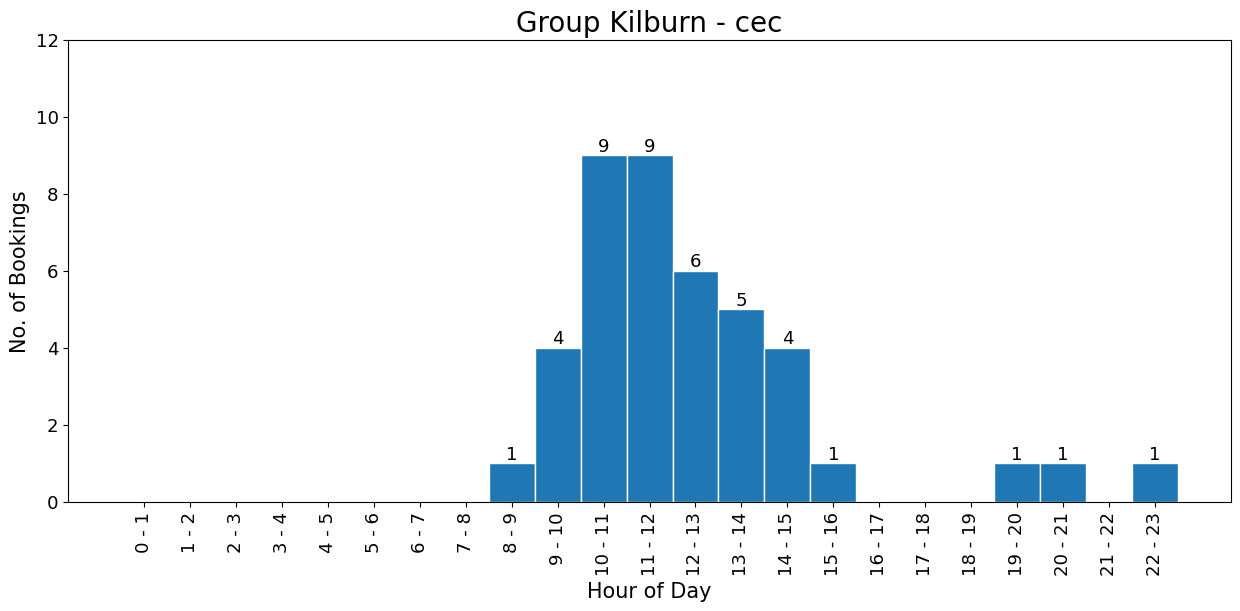

In [11]:
# Extract the hour from 'start'
klbBookings['hour'] = klbBookings['start'].dt.hour

plt.rcParams.update({'font.size': 13})

# Define bins for hours (0-23)
hour_bins = range(24)  # Include 0 to 24 (midnight to 11 PM)

# Make bookings histogram by hour
hour_hist, hour_bin_edges = np.histogram(klbBookings['hour'], bins=hour_bins)

fig, ax = plt.subplots(figsize=(15, 6))

# Plot the histogram heights against integers on the x axis
hour_bars = ax.bar(range(len(hour_hist)), hour_hist, width=1, edgecolor="White")

# Set the ticks to the middle of the bars
ax.set_xticks([i for i, j in enumerate(hour_hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{} - {}'.format(hour_bins[i], hour_bins[i+1]) for i, j in enumerate(hour_hist)], rotation = 90)

ax.set_xlabel("Hour of Day", fontsize = 15)
ax.set_ylabel("No. of Bookings", fontsize = 15)

# Add the title to the histogram
ax.set_title("Group Kilburn - cec", fontsize = 20)

# Calculate the total number of bookings for percentage calculation
total_bookings = len(klbBookings)
print(total_bookings, 'bookings were made in total.')

# Add the y-axis value at the top of each bin - all bookings
for i, bar in enumerate(hour_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    if height != 0:
        ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
    
    # Calculate and display the percentage
    percentage = (height / total_bookings) * 100
    
#     if percentage != 0:
#         ax.text(bar.get_x() + bar.get_width() / 2, height + 2, f"{percentage:.2f}%", ha='center', va='bottom', fontweight='bold')

# Extend the y-axis by setting the minimum and maximum limits
min_y = 0
max_y = 12  # Add some extra space above the highest bar
ax.set_ylim(min_y, max_y)

plt.savefig('cec_group_kilburn_hourly_distribution_histogram.png', dpi=300, bbox_inches='tight')
plt.show()

15 bookings were made in total.


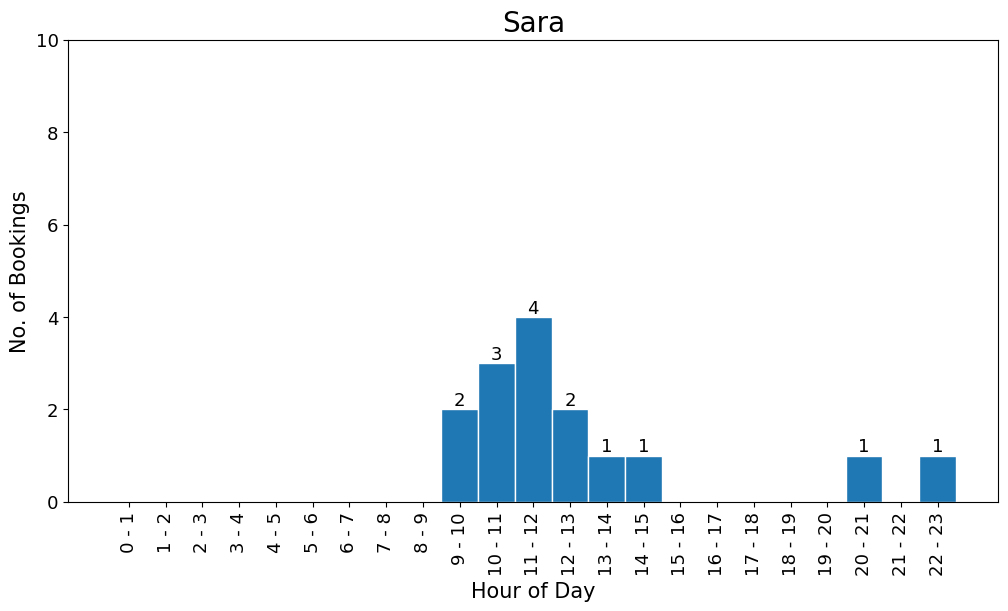

In [12]:
# User 30

bookingsUser30 = klbBookings.loc[klbBookings['user'] == 30].copy()

# Extract the hour from 'start'
bookingsUser30['hour'] = bookingsUser30['start'].dt.hour

plt.rcParams.update({'font.size': 13})

# Define bins for hours (0-23)
hour_bins = range(24)  # Include 0 to 24 (midnight to 11 PM)

# Make bookings histogram by hour
hour_hist, hour_bin_edges = np.histogram(bookingsUser30['hour'], bins=hour_bins)

fig, ax = plt.subplots(figsize=(12, 6))

# Plot the histogram heights against integers on the x axis
hour_bars = ax.bar(range(len(hour_hist)), hour_hist, width=1, edgecolor="White")

# Set the ticks to the middle of the bars
ax.set_xticks([i for i, j in enumerate(hour_hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{} - {}'.format(hour_bins[i], hour_bins[i+1]) for i, j in enumerate(hour_hist)], rotation = 90)

ax.set_xlabel("Hour of Day", fontsize = 15)
ax.set_ylabel("No. of Bookings", fontsize = 15)

# Add the title to the histogram
ax.set_title("Sara", fontsize = 20)

# Calculate the total number of bookings for percentage calculation
total_bookings = len(bookingsUser30)
print(total_bookings, 'bookings were made in total.')

# Add the y-axis value at the top of each bin - all bookings
for i, bar in enumerate(hour_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    if height != 0:
        ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
    
    # Calculate and display the percentage
    percentage = (height / total_bookings) * 100
    
#     if percentage != 0:
#         ax.text(bar.get_x() + bar.get_width() / 2, height + 1.5, f"{percentage:.2f}%", ha='center', va='bottom', fontweight='bold')

# Extend the y-axis by setting the minimum and maximum limits
min_y = 0
max_y = 10  # Add some extra space above the highest bar
ax.set_ylim(min_y, max_y)

plt.savefig('sara_hourly_distribution_histogram.png', dpi=300, bbox_inches='tight')
plt.show()

12 bookings were made in total.


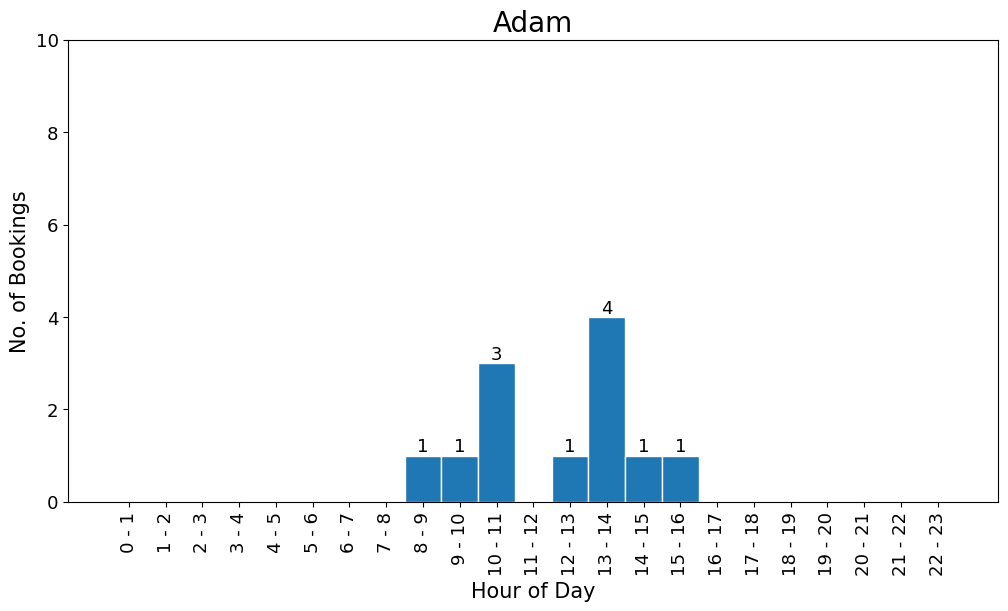

In [13]:
# User 31

bookingsUser31 = klbBookings.loc[klbBookings['user'] == 31].copy()

# Extract the hour from 'start'
bookingsUser31['hour'] = bookingsUser31['start'].dt.hour

plt.rcParams.update({'font.size': 13})

# Define bins for hours (0-23)
hour_bins = range(24)  # Include 0 to 24 (midnight to 11 PM)

# Make bookings histogram by hour
hour_hist, hour_bin_edges = np.histogram(bookingsUser31['hour'], bins=hour_bins)

fig, ax = plt.subplots(figsize=(12, 6))

# Plot the histogram heights against integers on the x axis
hour_bars = ax.bar(range(len(hour_hist)), hour_hist, width=1, edgecolor="White")

# Set the ticks to the middle of the bars
ax.set_xticks([i for i, j in enumerate(hour_hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{} - {}'.format(hour_bins[i], hour_bins[i+1]) for i, j in enumerate(hour_hist)], rotation = 90)

ax.set_xlabel("Hour of Day", fontsize = 15)
ax.set_ylabel("No. of Bookings", fontsize = 15)

# Add the title to the histogram
ax.set_title("Adam", fontsize = 20)

# Calculate the total number of bookings for percentage calculation
total_bookings = len(bookingsUser31)
print(total_bookings, 'bookings were made in total.')

# Add the y-axis value at the top of each bin - all bookings
for i, bar in enumerate(hour_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    if height != 0:
        ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
    
    # Calculate and display the percentage
    percentage = (height / total_bookings) * 100
    
#     if percentage != 0:
#         ax.text(bar.get_x() + bar.get_width() / 2, height + 1.5, f"{percentage:.2f}%", ha='center', va='bottom', fontweight='bold')

# Extend the y-axis by setting the minimum and maximum limits
min_y = 0
max_y = 10  # Add some extra space above the highest bar
ax.set_ylim(min_y, max_y)

plt.savefig('adam_hourly_distribution_histogram.png', dpi=300, bbox_inches='tight')
plt.show()

14 bookings were made in total.


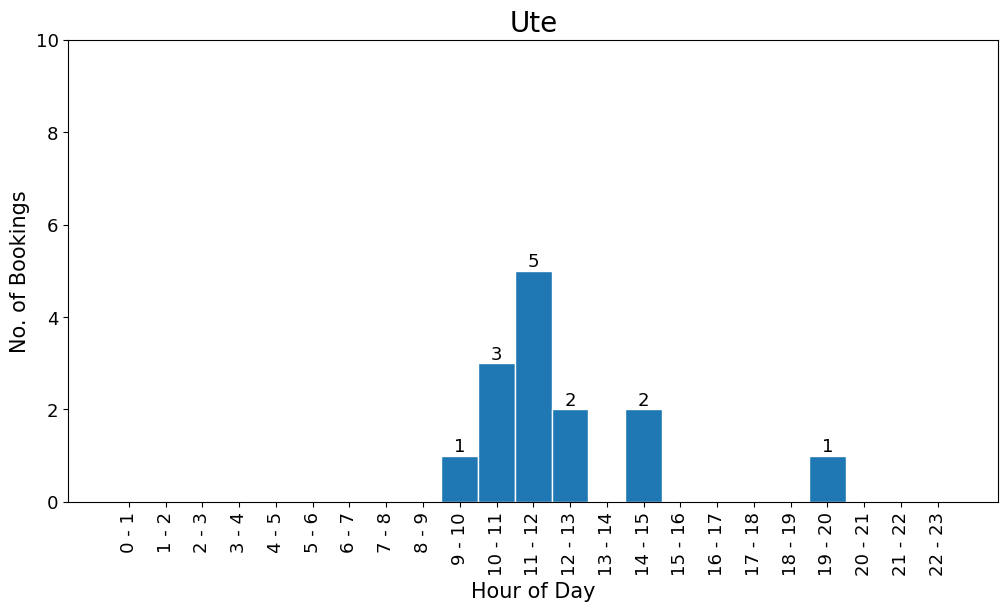

In [14]:
# User 32

bookingsUser32 = klbBookings.loc[klbBookings['user'] == 32].copy()

# Extract the hour from 'start'
bookingsUser32['hour'] = bookingsUser32['start'].dt.hour

plt.rcParams.update({'font.size': 13})

# Define bins for hours (0-23)
hour_bins = range(24)  # Include 0 to 24 (midnight to 11 PM)

# Make bookings histogram by hour
hour_hist, hour_bin_edges = np.histogram(bookingsUser32['hour'], bins=hour_bins)

fig, ax = plt.subplots(figsize=(12, 6))

# Plot the histogram heights against integers on the x axis
hour_bars = ax.bar(range(len(hour_hist)), hour_hist, width=1, edgecolor="White")

# Set the ticks to the middle of the bars
ax.set_xticks([i for i, j in enumerate(hour_hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{} - {}'.format(hour_bins[i], hour_bins[i+1]) for i, j in enumerate(hour_hist)], rotation = 90)

ax.set_xlabel("Hour of Day", fontsize = 15)
ax.set_ylabel("No. of Bookings", fontsize = 15)

# Add the title to the histogram
ax.set_title("Ute", fontsize = 20)

# Calculate the total number of bookings for percentage calculation
total_bookings = len(bookingsUser32)
print(total_bookings, 'bookings were made in total.')

# Add the y-axis value at the top of each bin - all bookings
for i, bar in enumerate(hour_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    if height != 0:
        ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
    
    # Calculate and display the percentage
    percentage = (height / total_bookings) * 100
    
#     if percentage != 0:
#         ax.text(bar.get_x() + bar.get_width() / 2, height + 1.5, f"{percentage:.2f}%", ha='center', va='bottom', fontweight='bold')

# Extend the y-axis by setting the minimum and maximum limits
min_y = 0
max_y = 10  # Add some extra space above the highest bar
ax.set_ylim(min_y, max_y)

plt.savefig('ute_hourly_distribution_histogram.png', dpi=300, bbox_inches='tight')
plt.show()

1 bookings were made in total.


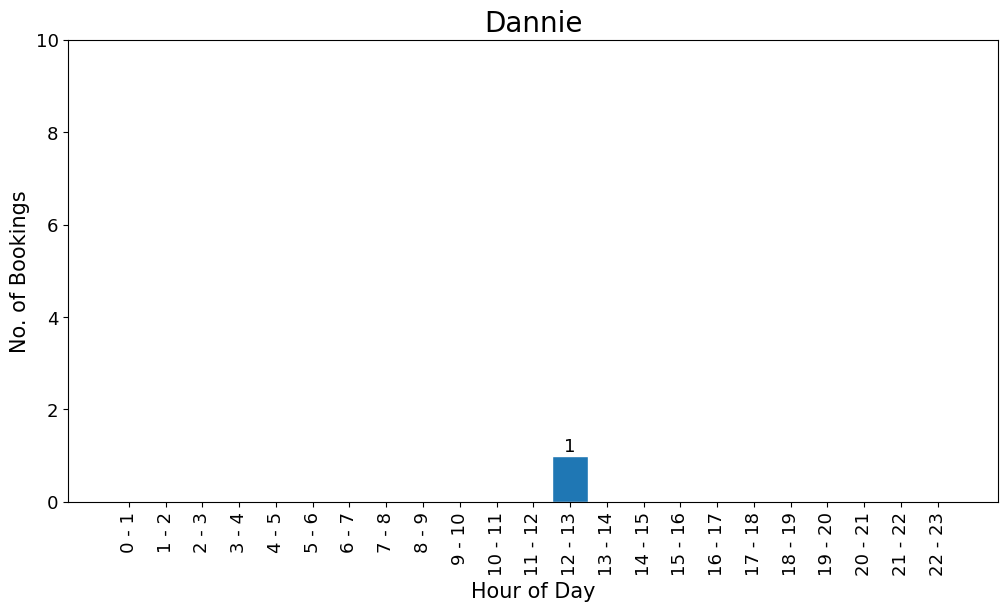

In [15]:
# User 33

bookingsUser33 = klbBookings.loc[klbBookings['user'] == 33].copy()

# Extract the hour from 'start'
bookingsUser33['hour'] = bookingsUser33['start'].dt.hour

plt.rcParams.update({'font.size': 13})

# Define bins for hours (0-23)
hour_bins = range(24)  # Include 0 to 24 (midnight to 11 PM)

# Make bookings histogram by hour
hour_hist, hour_bin_edges = np.histogram(bookingsUser33['hour'], bins=hour_bins)

fig, ax = plt.subplots(figsize=(12, 6))

# Plot the histogram heights against integers on the x axis
hour_bars = ax.bar(range(len(hour_hist)), hour_hist, width=1, edgecolor="White")

# Set the ticks to the middle of the bars
ax.set_xticks([i for i, j in enumerate(hour_hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{} - {}'.format(hour_bins[i], hour_bins[i+1]) for i, j in enumerate(hour_hist)], rotation = 90)

ax.set_xlabel("Hour of Day", fontsize = 15)
ax.set_ylabel("No. of Bookings", fontsize = 15)

# Add the title to the histogram
ax.set_title("Dannie", fontsize = 20)

# Calculate the total number of bookings for percentage calculation
total_bookings = len(bookingsUser33)
print(total_bookings, 'bookings were made in total.')

# Add the y-axis value at the top of each bin - all bookings
for i, bar in enumerate(hour_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    if height != 0:
        ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
    
    # Calculate and display the percentage
    percentage = (height / total_bookings) * 100
    
#     if percentage != 0:
#         ax.text(bar.get_x() + bar.get_width() / 2, height + 1.5, f"{percentage:.2f}%", ha='center', va='bottom', fontweight='bold')

# Extend the y-axis by setting the minimum and maximum limits
min_y = 0
max_y = 10  # Add some extra space above the highest bar
ax.set_ylim(min_y, max_y)

plt.savefig('dannie_hourly_distribution_histogram.png', dpi=300, bbox_inches='tight')
plt.show()